### Import libraries

In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

### Import data

In [2]:
dataset = keras.datasets.fashion_mnist
((train_images, train_id), (test_images, test_id)) = dataset.load_data()

### Visualize data images

In [3]:
# Name clothes id
id_classification = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

C:\Users\paulo\AppData\Local\Temp\ipykernel_7976\1873367447.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,5,i+1)


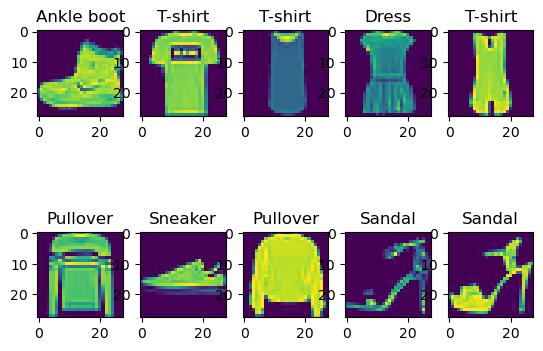

In [4]:
plt.imshow(train_images[0])
plt.title(train_id[0])

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(train_images[i])
    plt.title(id_classification[train_id[i]])

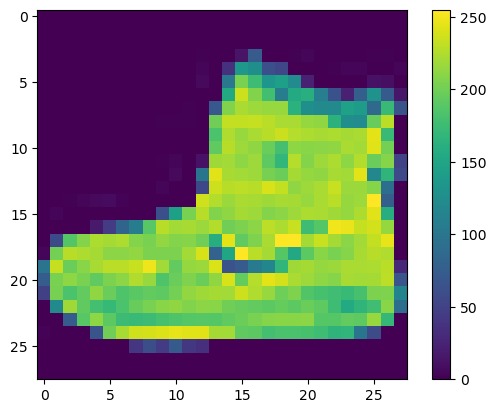

In [5]:
# color bar

plt.imshow(train_images[0])
plt.colorbar()

In [6]:
# Normalization

train_images = train_images/float(255)

In [17]:
model = keras.Sequential(
    [
        keras.layers.Flatten(
            input_shape=(28,28)
        ),
        keras.layers.Dense(
            units=256, activation='relu'
        ),
        keras.layers.Dropout(
            0.1
        ),
        keras.layers.Dense(
            units=10, activation='softmax'
        )
        
    ]
)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



history = model.fit(train_images, train_id, epochs=3, validation_split=0.2)

Epoch 1/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7710 - loss: 0.6488 - val_accuracy: 0.8537 - val_loss: 0.4073
Epoch 2/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8594 - loss: 0.3894 - val_accuracy: 0.8659 - val_loss: 0.3680
Epoch 3/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8719 - loss: 0.3485 - val_accuracy: 0.8729 - val_loss: 0.3530


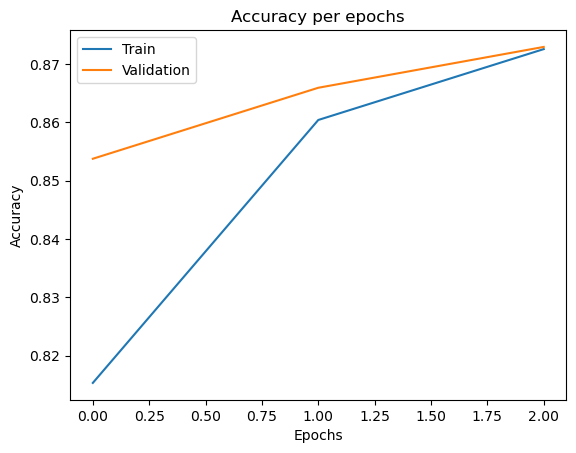

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy per epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

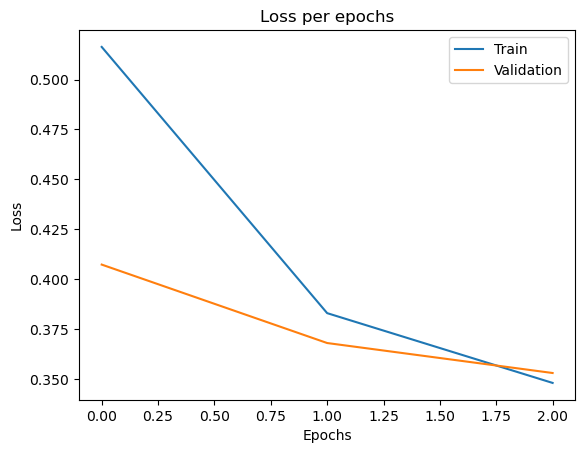

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss per epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

In [22]:
# Save model

model.save('model.keras')
saved_model = load_model('model.keras')

c:\Users\paulo\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [10]:
# Evaluate

loss, accuracy = model.evaluate(test_images, test_id)
print(f'Accuracy: {round(accuracy*100,2)}%')
print(f'Loss: {loss}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8410 - loss: 55.0812
Accuracy: 84.1%
Loss: 58.18782043457031


In [29]:
# Test

test_saved_model = saved_model.predict(test_images)
print(f'Image: {(test_id[1])}')
print(f'Predicted image: {np.argmax(test_saved_model[1])}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Image: 2
Predicted image: 2
